In [1]:
#import dependencies - first will look at dow jones industrial average index over same time as LDA analysis dataset
#8-8-2008 thru 7-1-2016
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import pandas_datareader as web

In [2]:
#using the pandas datareader, its pretty quick to bring in stock prices to a pandas dataframe
df = web.DataReader('DJIA', data_source='yahoo', start='2008-08-08', end='2016-07-01')
df["days"] = np.arange(len(df))
df.head()

,High,Low,Open,Close,Volume,Adj Close,days
Date,,,,,,,
2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4966810000,11734.320312,0
2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5067310000,11782.349609,1
2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4711290000,11642.469727,2
2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4787600000,11532.959961,3
2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4064000000,11615.929688,4


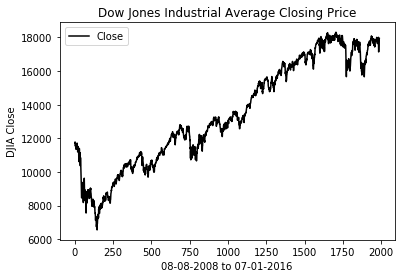

In [4]:
#plot the close price to see what we're working with
x = list(df["days"])
y = list(df["Close"])
plt.plot(x, y, color="black", label="Close")
plt.xlabel("08-08-2008 to 07-01-2016")
plt.ylabel("DJIA Close")
plt.title("Dow Jones Industrial Average Closing Price")
plt.legend()
plt.show()

In [5]:
#create some moving averages
df["SMA20"] = df["Close"].rolling(window=20).mean()
df["SMA30"] = df["Close"].rolling(window=30).mean()
df["SMA50"] = df["Close"].rolling(window=50).mean()
df["SMA100"] = df["Close"].rolling(window=100).mean()
df["SMA200"] = df["Close"].rolling(window=200).mean()

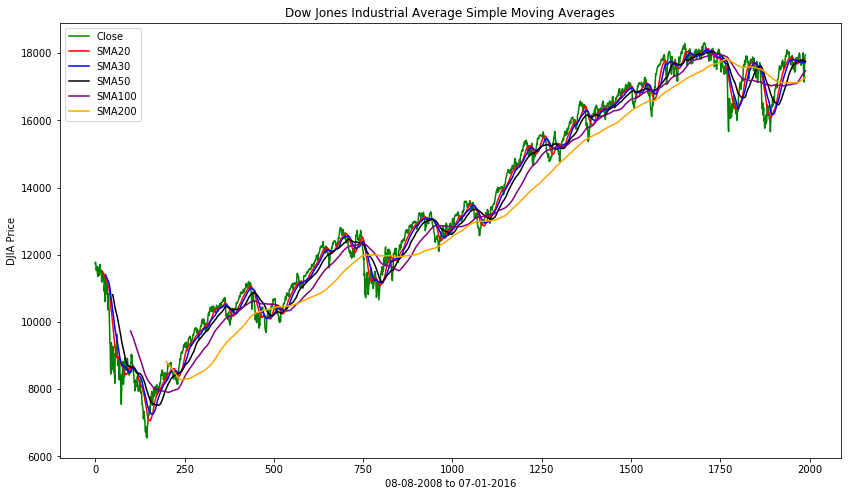

In [6]:
#plot all the moving averages because why not
x = list(df["days"])
y = list(df["Close"])
plt.figure(figsize=(14,8))
plt.plot(x, y, color="green", label="Close")
plt.plot(x, list(df["SMA20"]), color="red", label="SMA20")
plt.plot(x, list(df["SMA30"]), color="blue", label="SMA30")
plt.plot(x, list(df["SMA50"]), color="black", label="SMA50")
plt.plot(x, list(df["SMA100"]), color="purple", label="SMA100")
plt.plot(x, list(df["SMA200"]), color="orange", label="SMA200")
plt.xlabel("08-08-2008 to 07-01-2016")
plt.ylabel("DJIA Price")
plt.title("Dow Jones Industrial Average Simple Moving Averages")
plt.legend()
plt.show()

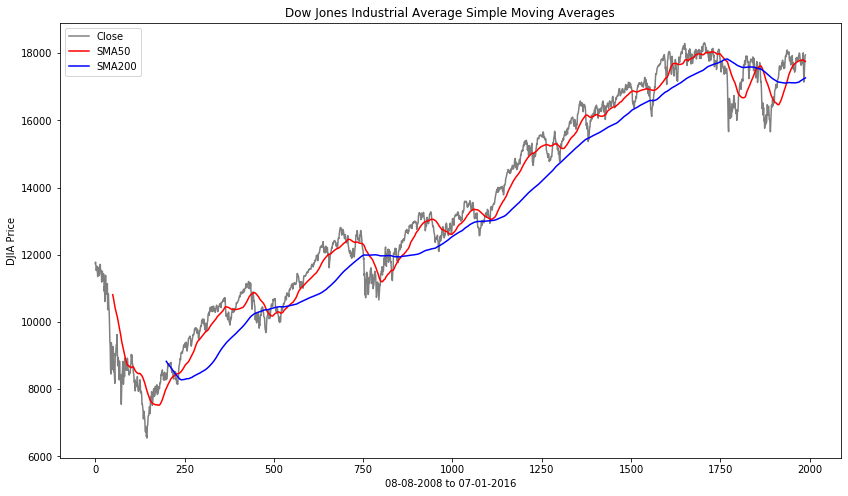

In [7]:
#we will focus on the 50-day and the 200-day - you could use other SMA's for further analysis if desired. 
x = list(df["days"])
y = list(df["Close"])
plt.figure(figsize=(14,8))
plt.plot(x, y, color="black", label="Close", alpha=.5)
plt.plot(x, list(df["SMA50"]), color="red", label="SMA50")
plt.plot(x, list(df["SMA200"]), color="blue", label="SMA200")
plt.xlabel("08-08-2008 to 07-01-2016")
plt.ylabel("DJIA Price")
plt.title("Dow Jones Industrial Average Simple Moving Averages")
plt.legend()
plt.show()

In [11]:
#define a function that sends prices to arrays when buy and sell signals are flagged. 
def buy_sell(data):
    buyPriceSignal = []
    sellPriceSignal = []
    flag = -1
    for i in range(len(data)):
        if data["SMA50"][i] > data["SMA200"][i]:
            if flag != 1:
                buyPriceSignal.append(data["Close"][i])
                sellPriceSignal.append(np.nan)
                flag = 1
            else:
                buyPriceSignal.append(np.nan)
                sellPriceSignal.append(np.nan)
        elif data["SMA50"][i] < data["SMA200"][i]:
            if flag != 0:
                buyPriceSignal.append(np.nan)
                sellPriceSignal.append(data["Close"][i])
                flag = 0
            else:
                buyPriceSignal.append(np.nan)
                sellPriceSignal.append(np.nan)
        else:
            buyPriceSignal.append(np.nan)
            sellPriceSignal.append(np.nan)
    return(buyPriceSignal, sellPriceSignal)
    
    

In [12]:
#run the function and add the columns to the dataframe with the signal prices (these only show when flagged)
buy_sell = buy_sell(df)
df["Buy_Signal_Price"] = buy_sell[0]
df["Sell_Signal_Price"] = buy_sell[1]


In [14]:
#df.head() if interested

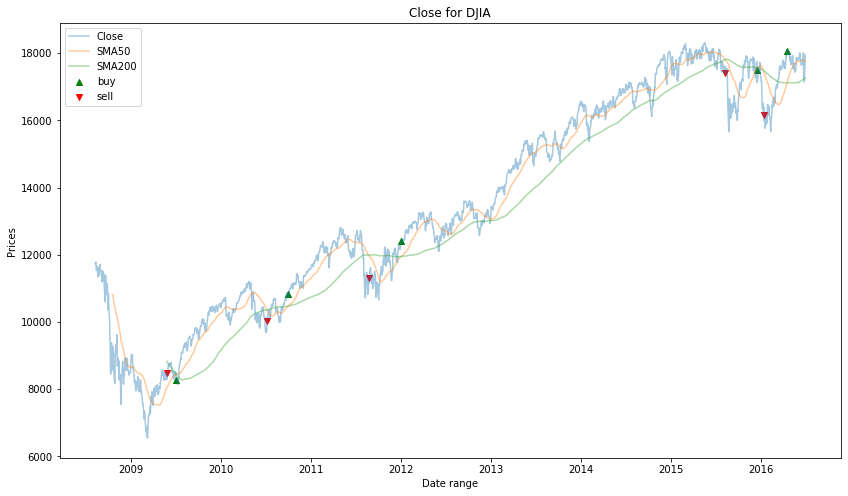

In [16]:
#visualize the data and strategy - again, we are using a 50 and 200 day moving average for analysis.
plt.figure(figsize=(14,8))
plt.plot(df["Close"], label = "Close", alpha = .4)
plt.plot(df["SMA50"], label = "SMA50", alpha = .4)
plt.plot(df["SMA200"], label= "SMA200", alpha = .4)
plt.scatter(df.index, df["Buy_Signal_Price"], label="buy", marker="^", color="green")
plt.scatter(df.index, df["Sell_Signal_Price"], label="sell", marker="v", color="red")
plt.title("Close for DJIA")
plt.xlabel("Date range")
plt.ylabel("Prices")
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Will need to define a function to calculate the results. 
#The simplist way is to sum up the buy prices, and subtract from the sum of sell prices.
#With more time on this project, would look at drawdown analysis, max loss, max gain, portfolio values over time, etc.

In [25]:
#So we also want to analyze all the stocks in the Dow Jones, for user interaction on the plotly chart on website. 
#Here we define the symbols in the Dow Jones
symbols = ["DJIA","MMM","AXP","AAPL","BA","CAT","CVX","CSCO","KO","DIS","XOM","GS","HD","IBM","INTC","JNJ","JPM","MCD","MRK","MSFT","NKE","PFE","PG","TRV","UTX","UNH","VZ","V","WMT","WBA"]

#Here we make a function to loop through them and create csv data files. 
def make_csv_data(symbols):
    for symbol in symbols:
        df = web.DataReader(f'{symbol}', data_source='yahoo', start='2008-08-08', end='2016-07-01')
        df["days"] = np.arange(len(df))
        df["SMA20"] = df["Close"].rolling(window=20).mean()
        df["SMA30"] = df["Close"].rolling(window=30).mean()
        df["SMA50"] = df["Close"].rolling(window=50).mean()
        df["SMA100"] = df["Close"].rolling(window=100).mean()
        df["SMA200"] = df["Close"].rolling(window=200).mean()
        
        def buy_sell(data):
            buyPriceSignal = []
            sellPriceSignal = []
            flag = -1
            for i in range(len(data)):
                if data["SMA50"][i] > data["SMA200"][i]:
                    if flag != 1:
                        buyPriceSignal.append(data["Close"][i])
                        sellPriceSignal.append(np.nan)
                        flag = 1
                    else:
                        buyPriceSignal.append(np.nan)
                        sellPriceSignal.append(np.nan)
                elif data["SMA50"][i] < data["SMA200"][i]:
                    if flag != 0:
                        buyPriceSignal.append(np.nan)
                        sellPriceSignal.append(data["Close"][i])
                        flag = 0
                    else:
                        buyPriceSignal.append(np.nan)
                        sellPriceSignal.append(np.nan)
                else:
                    buyPriceSignal.append(np.nan)
                    sellPriceSignal.append(np.nan)
            return(buyPriceSignal, sellPriceSignal)
        
        buy_sell = buy_sell(df)
        df["Buy_Signal_Price"] = buy_sell[0]
        df["Sell_Signal_Price"] = buy_sell[1]
        df["Symbol"] = f'{symbol}'
        df.to_csv(f'{symbol}.csv')

In [26]:
#Run the function to create the csv with the data we want. Can take a minute or two. 
make_csv_data(symbols)

In [27]:
#bring back in the csv's to make one big csv for website data. 
DJIAdf = pd.read_csv('DJIA.csv')
MMMdf = pd.read_csv('MMM.csv')
AXPdf = pd.read_csv('AXP.csv')
AAPLdf = pd.read_csv('AAPL.csv')
BAdf = pd.read_csv('BA.csv')
CATdf = pd.read_csv('CAT.csv')
CVXdf = pd.read_csv('CVX.csv')
CSCOdf = pd.read_csv('CSCO.csv')
KOdf = pd.read_csv('KO.csv')
DISdf = pd.read_csv('DIS.csv')
XOMdf = pd.read_csv('XOM.csv')
GSdf = pd.read_csv('GS.csv')
HDdf = pd.read_csv('HD.csv')
IBMdf = pd.read_csv('IBM.csv')
INTCdf = pd.read_csv('INTC.csv')
JNJdf = pd.read_csv('JNJ.csv')
JPMdf = pd.read_csv('JPM.csv')
MCDdf = pd.read_csv('MCD.csv')
MRKdf = pd.read_csv('MRK.csv')
MSFTdf = pd.read_csv('MSFT.csv')
NKEdf = pd.read_csv('NKE.csv')
PFEdf = pd.read_csv('PFE.csv')
PGdf = pd.read_csv('PG.csv')
TRVdf = pd.read_csv('TRV.csv')
UTXdf = pd.read_csv('UTX.csv')
UNHdf = pd.read_csv('UNH.csv')
VZdf = pd.read_csv('VZ.csv')
Vdf = pd.read_csv('V.csv')
WMTdf = pd.read_csv('WMT.csv')
WBAdf = pd.read_csv('WBA.csv')
DowStocksandDJIA = pd.concat([DJIAdf,MMMdf,AXPdf,AAPLdf,BAdf,CATdf,CVXdf,CSCOdf,KOdf,DISdf,XOMdf,GSdf,HDdf,IBMdf,INTCdf,JNJdf,JPMdf,MCDdf,MRKdf,MSFTdf,NKEdf,PFEdf,PGdf,TRVdf,UTXdf,UNHdf,VZdf,Vdf,WMTdf,WBAdf], ignore_index=False)
DowStocksandDJIA

,Date,High,Low,Open,Close,Volume,Adj Close,days,SMA20,SMA30,SMA50,SMA100,SMA200,Buy_Signal_Price,Sell_Signal_Price,Symbol
0,2008-08-08,11808.490234,11344.230469,11432.089844,11734.320312,4.966810e+09,11734.320312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
1,2008-08-11,11933.549805,11580.190430,11729.669922,11782.349609,5.067310e+09,11782.349609,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
2,2008-08-12,11830.389648,11541.429688,11781.700195,11642.469727,4.711290e+09,11642.469727,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
3,2008-08-13,11689.049805,11377.370117,11632.809570,11532.959961,4.787600e+09,11532.959961,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
4,2008-08-14,11744.330078,11399.839844,11532.070312,11615.929688,4.064000e+09,11615.929688,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DJIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,81.360001,79.010002,80.940002,79.389999,6.714500e+06,72.394913,1984,81.2895,79.873333,80.1786,80.3024,82.22665,NaN,NaN,WBA
1985,2016-06-28,79.980003,78.989998,79.709999,79.879997,4.876700e+06,72.841743,1985,81.4135,79.907000,80.1512,80.3293,82.17405,NaN,NaN,WBA
1986,2016-06-29,83.339996,80.029999,80.339996,83.190002,7.039000e+06,75.860100,1986,81.6680,80.130667,80.1782,80.4092,82.13915,NaN,NaN,WBA
1987,2016-06-30,83.449997,82.209999,83.389999,83.269997,5.813200e+06,75.933052,1987,81.8765,80.355000,80.2210,80.5128,82.10090,NaN,NaN,WBA


In [29]:
DowStocksandDJIA.to_csv("DowStocksandDJIA_Data.csv")